# Keras untuk CNN Cat Vs Non Cat

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils2 import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


# 1 - Cat Vs Non Cat

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.
# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 209
number of test examples = 50
X_train shape: (209, 64, 64, 3)
Y_train shape: (209, 1)
X_test shape: (50, 64, 64, 3)
Y_test shape: (50, 1)


# 2 - Building a model in Keras

In [3]:
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='CatModel')

    return model

In [4]:

# GRADED FUNCTION: CatModel

def CatModel(input_shape):
    """
    Implementation of the CatModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='CatModel')
    
    
    ### END CODE HERE ###
    
    return model

# Exercise: Implement step 1, i.e. create the model.

In [5]:
### START CODE HERE ### (1 line)
CatModel = CatModel((64,64,3))
### END CODE HERE ###

W0730 14:04:10.127470  8272 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 14:04:10.595629  8272 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 14:04:10.756794  8272 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 14:04:10.907549  8272 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_d

# Exercise: Implement step 2, i.e. compile the model to configure the learning process. Choose the 3 arguments of compile() wisely. 

In [6]:
### START CODE HERE ### (1 line)
CatModel.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
### END CODE HERE ###

W0730 14:04:11.794649  8272 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 14:04:11.816618  8272 deprecation.py:323] From c:\program files\python35\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Exercise: Implement step 3, i.e. train the model. Choose the number of epochs and the batch size.

In [7]:
### START CODE HERE ### (1 line)
CatModel.fit(x = X_train,y = Y_train,epochs =60 ,batch_size = 60 )
### END CODE HERE ###

Epoch 1/60
209/209 [==============================] - 4s 18ms/step - loss: 3.9190 - acc: 0.5742
Epoch 2/60
209/209 [==============================] - 2s 10ms/step - loss: 4.5372 - acc: 0.6555
Epoch 3/60
209/209 [==============================] - 2s 10ms/step - loss: 2.2685 - acc: 0.5407
Epoch 4/60
209/209 [==============================] - 2s 9ms/step - loss: 1.6489 - acc: 0.6794
Epoch 5/60
209/209 [==============================] - 2s 9ms/step - loss: 1.2209 - acc: 0.6986
Epoch 6/60
209/209 [==============================] - 2s 9ms/step - loss: 0.7992 - acc: 0.7799
Epoch 7/60
209/209 [==============================] - 2s 9ms/step - loss: 0.5314 - acc: 0.8086
Epoch 8/60
209/209 [==============================] - 2s 9ms/step - loss: 0.5744 - acc: 0.7990
Epoch 9/60
209/209 [==============================] - 2s 9ms/step - loss: 0.6135 - acc: 0.7895
Epoch 10/60
209/209 [==============================] - 2s 9ms/step - loss: 0.3136 - acc: 0.8612
Epoch 11/60
209/209 [=========================

# Exercise: Implement step 4, i.e. test/evaluate the model.

In [8]:
### START CODE HERE ### (1 line)
preds = CatModel.evaluate(x=X_test, y=Y_test, batch_size=150)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

50/50 [==============================] - 0s 5ms/step

Loss = 0.6071200966835022
Test Accuracy = 0.8399999737739563


# 3 - Conclusion
# 4 - Test with your own image (Optional)

[[1.]]


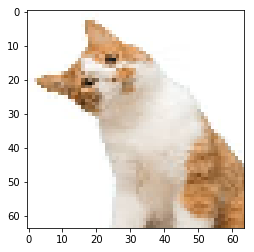

In [16]:
### START CODE HERE ###
img_path = 'images/my_images2.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(CatModel.predict(x))

# 5 - Other useful functions in Keras (Optional)

In [10]:
CatModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

In [11]:
#plot_model(CatModel, to_file='CatModel.png')
#SVG(model_to_dot(CatModel).create(prog='dot', format='svg'))